# 190432J
# Pathirana R.P.U.A.

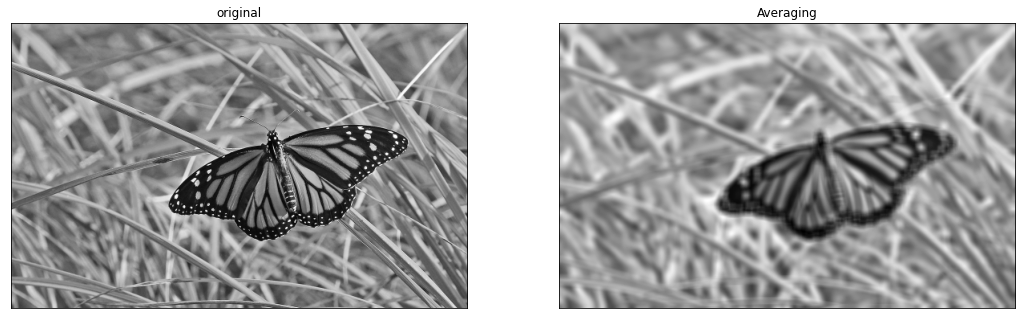

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread ( 'butterfly.jpg', cv . IMREAD_REDUCED_GRAYSCALE_2)

kernel = np.ones( ( 9 , 9 ) , np . float32 ) /81
imgc = cv.filter2D ( img , -1 , kernel )

fig , axes = plt.subplots( 1,2, sharex='all', sharey='all', figsize= (18,18) )
axes[0].imshow( img , cmap= 'gray' )
axes[0].set_title ( 'original' )
axes[0].set_xticks( [ ] ) , axes [0]. set_yticks([])
axes[1].imshow( imgc , cmap= 'gray' )
axes[1].set_title('Averaging')
axes[1].set_xticks( [ ] ) , axes[1]. set_yticks([])
plt.show()


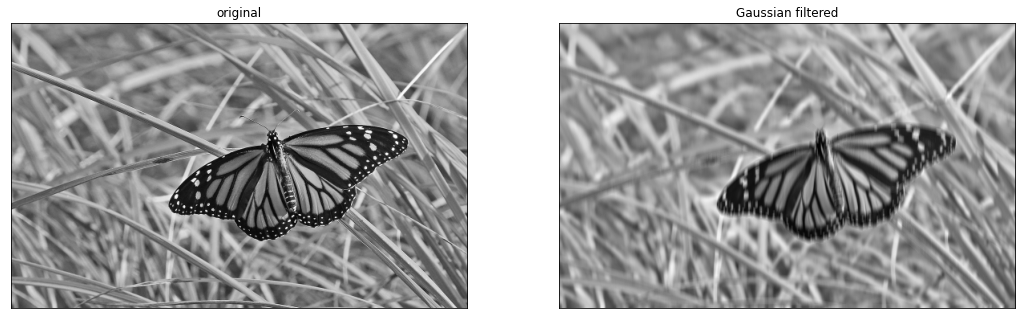

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread ( 'butterfly.jpg', cv . IMREAD_REDUCED_GRAYSCALE_2)

sigma = 4
kernel = cv.getGaussianKernel(9, sigma)
imgc = cv.filter2D ( img , -1 , kernel )

fig , axes = plt.subplots( 1,2, sharex='all', sharey='all', figsize= (18,18) )
axes[0].imshow( img , cmap= 'gray' )
axes[0].set_title ( 'original' )
axes[0].set_xticks( [ ] ) , axes [0]. set_yticks([])
axes[1].imshow( imgc , cmap= 'gray' )
axes[1].set_title('Gaussian filtered')
axes[1].set_xticks( [ ] ) , axes[1]. set_yticks([])
plt.show()

NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

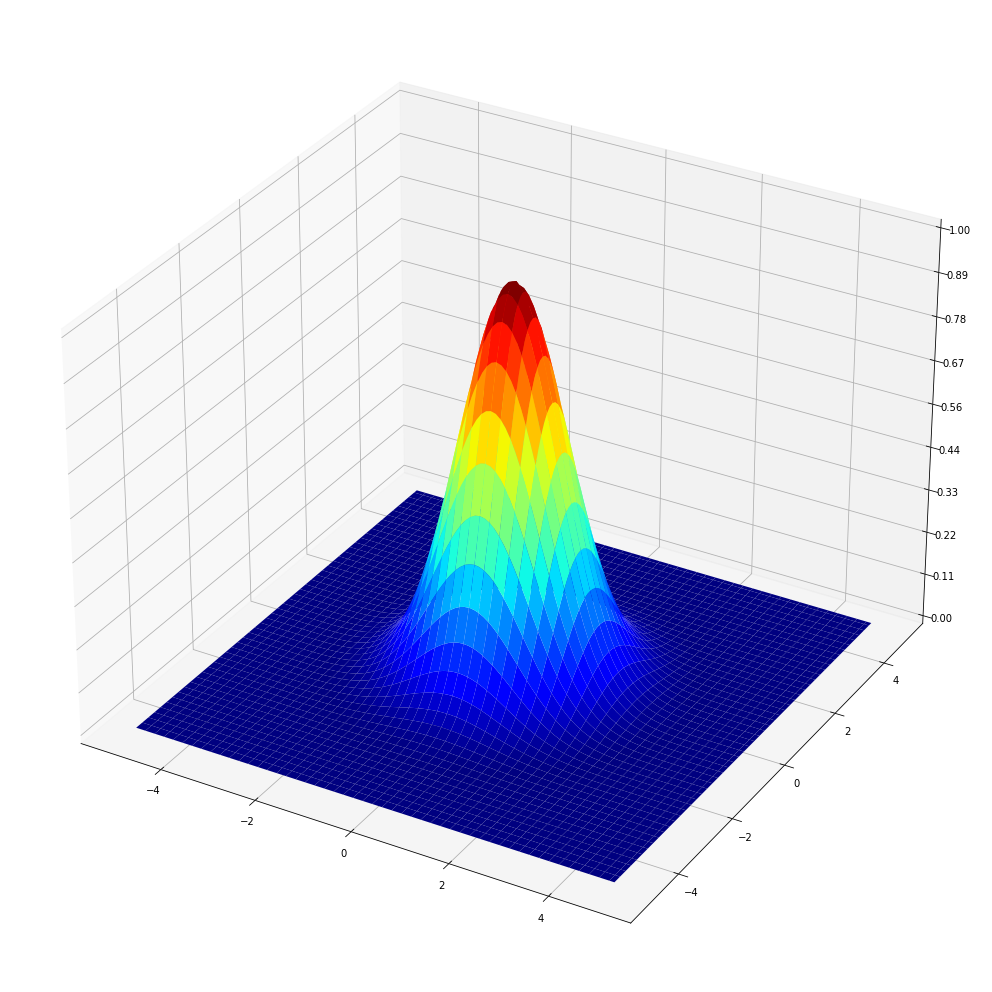

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111, projection='3d')
sigma = 1


X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.exp(-(X**2 + Y**2)/(2*sigma**2))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=True)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_aspect('equal', 'box')
#ax.view_init(90, 0)
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z) -1.5, cmap=cm.jet)
ax.set_zlim(np.min(Z) - 2, np.max(Z))

plt.axis('off')



plt.show()

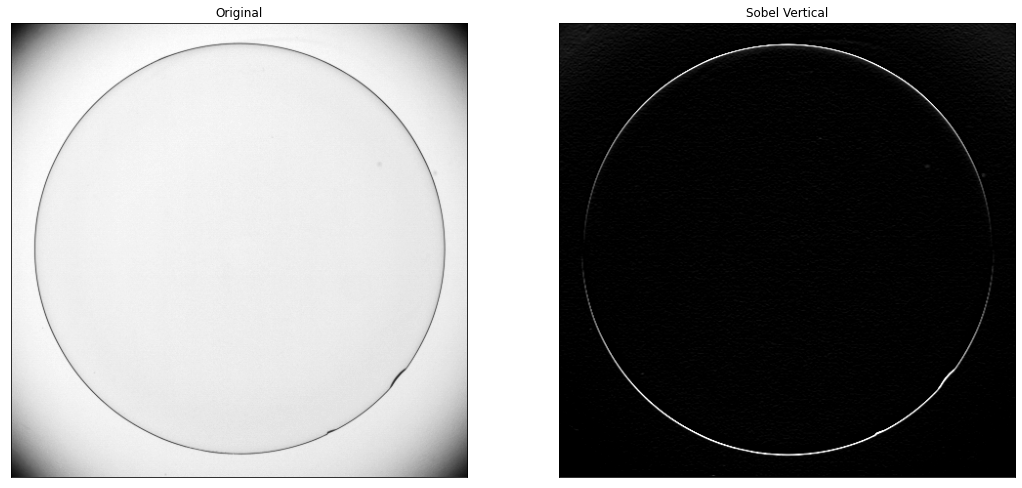

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('contact_lens.tif', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Sobel vertical
kernel = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
imgc = cv.filter2D(img,-1,kernel)



fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

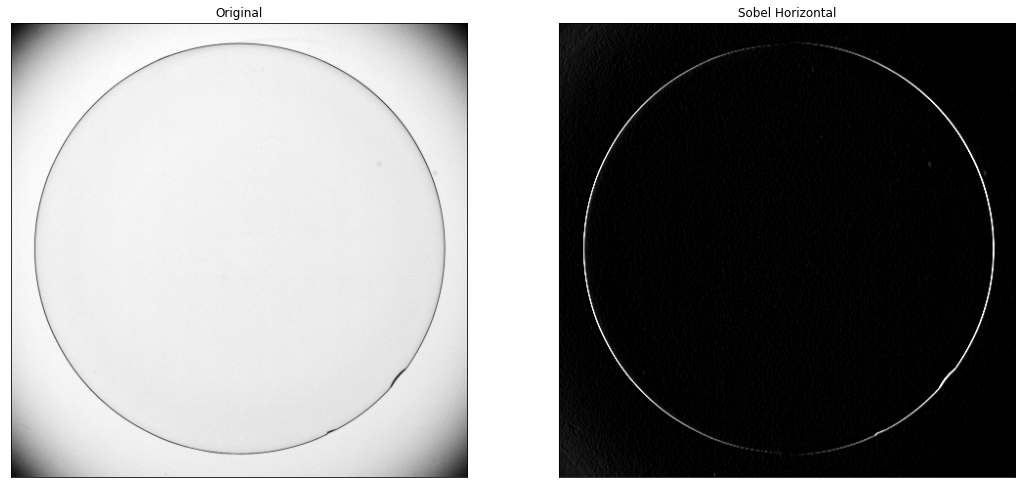

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('contact_lens.tif', cv.IMREAD_REDUCED_GRAYSCALE_2)


# Sobel horizontal
kernel = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float')
imgc = cv.filter2D(img,-1,kernel)


fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Sobel Horizontal')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

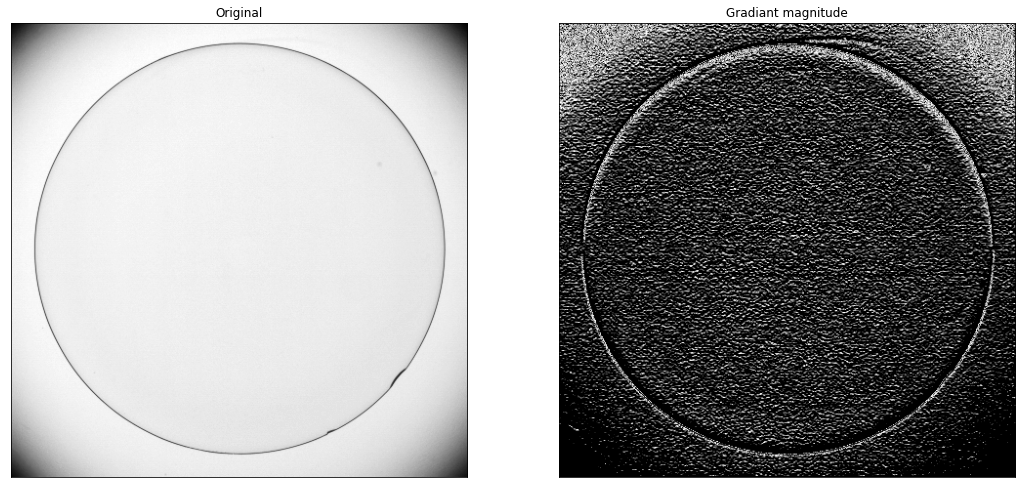

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('contact_lens.tif', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Sobel vertical
kernel_y = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float')
img_y = cv.filter2D(img,-1,kernel_y)

kernel_x = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float')
imgc_x = cv.filter2D(img,-1,kernel_y)

magitude = np.sqrt((imgc_x**2)+(img_y**2))

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(magitude, cmap='gray')
axes[1].set_title('Gradiant magnitude')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

DescribeResult(nobs=84135, minmax=(-82.0, 73.0), mean=-0.0036132406, variance=32.4608, skewness=-0.4506015047863718, kurtosis=24.616695400950462)


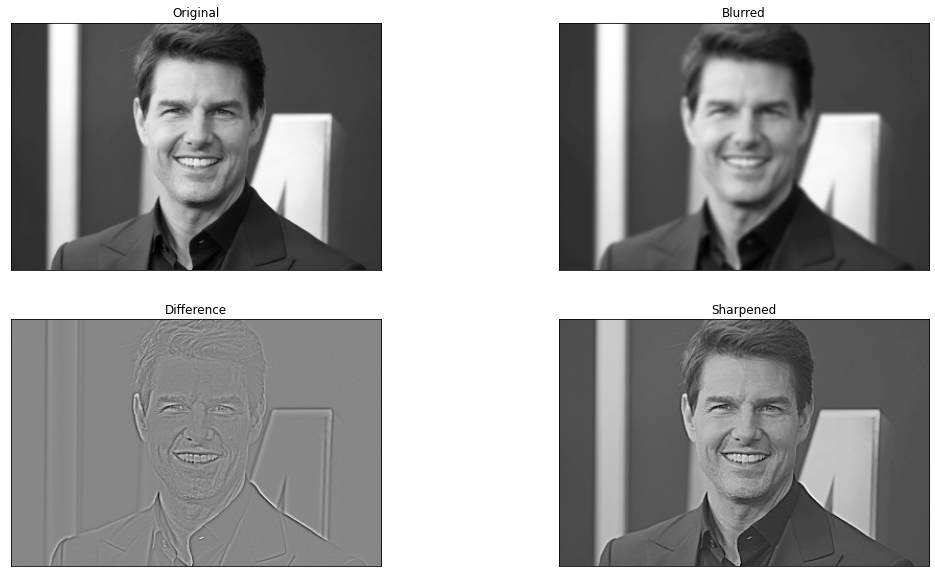

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats

img = cv.imread('tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

sigma = 2
kernel = cv.getGaussianKernel(5, sigma)
blurred = cv.sepFilter2D(img, -1, kernel, kernel, anchor=(-1,-1), delta=0, borderType=cv.BORDER_REPLICATE)
diff = img.astype('float32') - blurred.astype('float32')

sharpened = cv.addWeighted(img.astype('float32') , 1.0, diff, 1.5, 0)

print(stats.describe(diff.ravel()))

fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(18,10))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,1].imshow(blurred, cmap='gray')
axes[0,1].set_title('Blurred')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])
axes[1,0].imshow(diff + 125, cmap='gray')
axes[1,0].set_title('Difference')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,1].imshow(sharpened, cmap='gray')
axes[1,1].set_title('Sharpened')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])

plt.show()
